In [11]:
from tensorflow.keras.datasets import fashion_mnist

In [13]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [14]:
len(X_train)

60000

In [15]:
X_train.shape

(60000, 28, 28)

In [17]:
import matplotlib.pyplot as plt
import numpy as np
# 랜덤하게 100으로 뽑기 위해 설정
np.random.seed(100)

In [28]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
random_idx = np.random.randint(60000,size = 9)
random_idx 

array([10082, 20533, 13890, 40674,  5646, 49954, 13297, 43760, 20760])

#### 데이터 확인

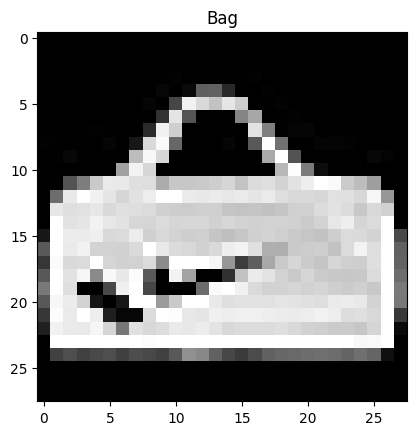

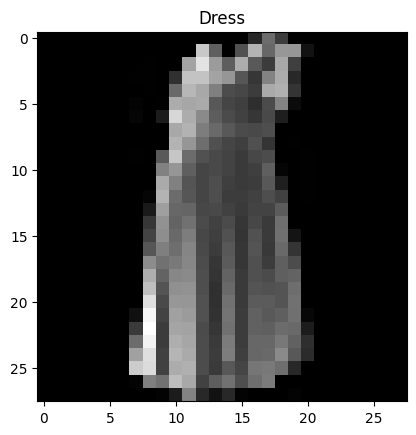

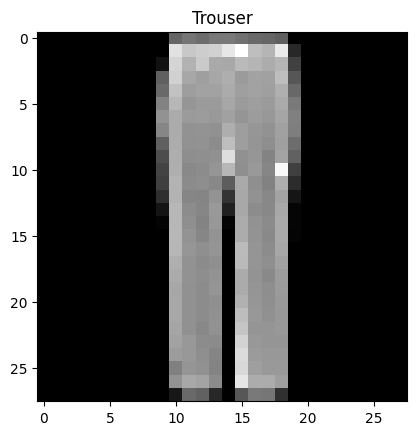

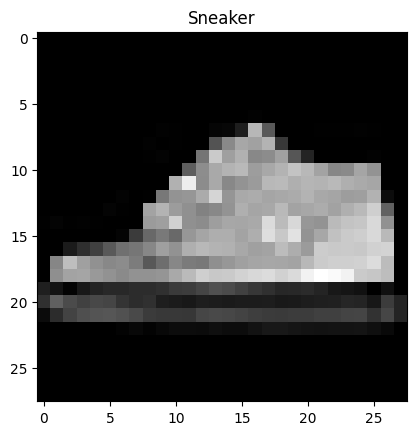

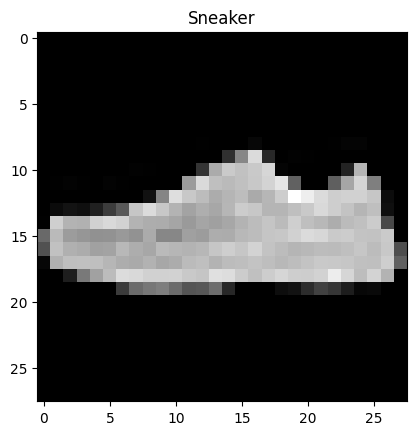

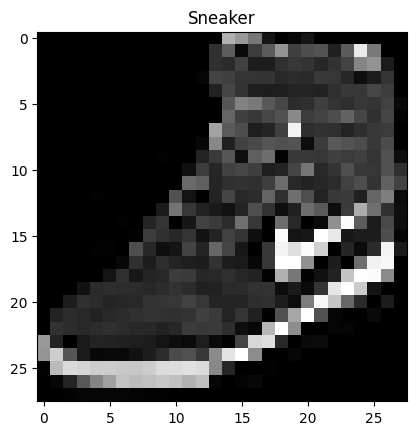

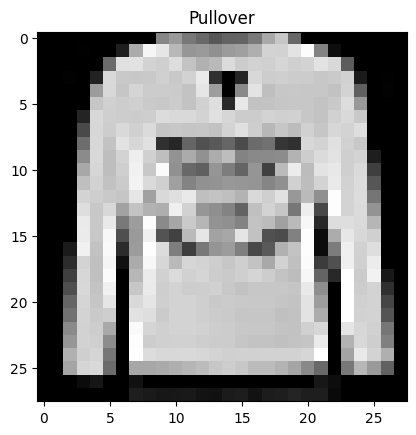

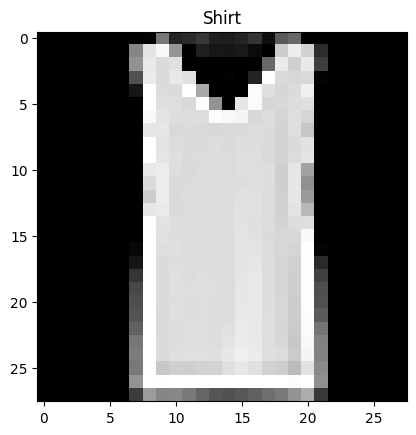

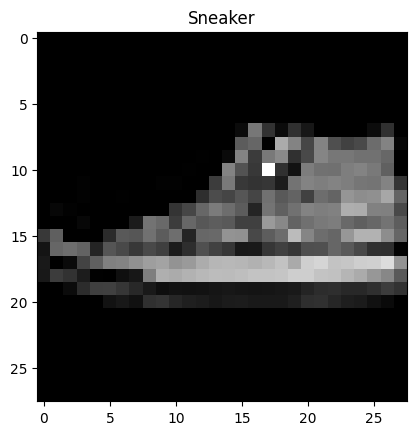

In [30]:
for temp in random_idx:
    plt.figure()
    plt.imshow(X_train[temp], cmap = 'gray')
    plt.title(class_names[y_train[temp]])

In [31]:
X_train = np.reshape(X_train/255, (-1, 28, 28,1))
# 스케일 작업하고 맨앞이 배치번호, 2~3번째는 w, h, 채널을 1로 설정 채널을 4차원으로 바꿨다.
# cnn은 채널값이 필요해서 맞춰서 reshape를 해준것이다.
X_test = np.reshape(X_test/255, (-1, 28, 28, 1))

In [32]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [33]:
from tensorflow.keras.utils import to_categorical
# 원핫 인코딩 형식으로 바꿔준다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, random_state = 100)

In [39]:
X_train.shape

(42000, 28, 28, 1)

In [40]:
y_train.shape

(42000, 10)

In [42]:
X_test.shape

(18000, 28, 28, 1)

In [43]:
y_test.shape

(18000, 10)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

model = Sequential(
    [
        # padding: 입력할 때 이미지의 사이즈와 출력될때 이미지의 사이즈를 똑같이 맞추겠다.
        # filters : 16개로 특징을 추출하겠다.
        # kernel_size : filter 사이즈이다. 3*3짜리
        
        Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (28,28,1)),
        MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'),
        Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'),
        MaxPool2D(pool_size = (2,2), strides = 2, padding ='same'),
        Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
        MaxPool2D(pool_size = (2,2), strides = 2, padding ='same'),
        Flatten(),
        Dense(64, activation = 'relu'),
        Dense(10, activation = 'softmax')
    ]
)


In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [47]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])
model.fit(X_train, y_train, epochs = 30, batch_size = 128)

Epoch 1/30
329/329 [==============================] - 2s 4ms/step - loss: 0.6542 - acc: 0.7610
Epoch 2/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3890 - acc: 0.8590
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3304 - acc: 0.8805
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.2988 - acc: 0.8915
Epoch 5/30
329/329 [==============================] - 2s 6ms/step - loss: 0.2795 - acc: 0.8981
Epoch 6/30
329/329 [==============================] - 2s 5ms/step - loss: 0.2606 - acc: 0.9061
Epoch 7/30
329/329 [==============================] - 2s 6ms/step - loss: 0.2450 - acc: 0.9095
Epoch 8/30
329/329 [==============================] - 2s 6ms/step - loss: 0.2281 - acc: 0.9166
Epoch 9/30
329/329 [==============================] - 2s 6ms/step - loss: 0.2209 - acc: 0.9199
Epoch 10/30
329/329 [==============================] - 2s 6ms/step - loss: 0.2062 - acc: 0.9253
Epoch 11/30
329/329 [============================

In [48]:
model.evaluate(X_test, y_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.3391 - acc: 0.9103


[0.33906471729278564, 0.9103333353996277]

# 신경망 cnn 모델 차이

In [49]:
model_dense = Sequential()
model_dense.add(Dense(128, activation = 'relu', input_shape = (784,)))
model_dense.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
Total params: 100,480
Trainable params: 100,480
Non-trainable params: 0
_________________________________________________________________


In [51]:
# 파라미터가 훨씬 적게 들어가서 계산량도 적고 메모리도 적게 잡아먹는다.(효율적이다.)
model_conv2d = Sequential()
model_conv2d.add(Conv2D(1000, 3, activation = 'relu', input_shape = (28,28,1)))

model_conv2d.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 1000)      10000     
                                                                 
Total params: 10,000
Trainable params: 10,000
Non-trainable params: 0
_________________________________________________________________


# lenet-5

In [162]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [163]:
X_train.shape

(50000, 32, 32, 3)

In [164]:
X_train = np.mean(X_train, axis=3, keepdims=True)
X_test = np.mean(X_test, axis=3, keepdims=True)


In [145]:
import matplotlib.pyplot as plt
import numpy as np
# 랜덤하게 100으로 뽑기 위해 설정
np.random.seed(100)

In [146]:
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]
random_idx = np.random.randint(50000,size = 9)
random_idx 

array([38408, 14147, 12119,    79, 16304, 16734, 14260, 10082, 20533])

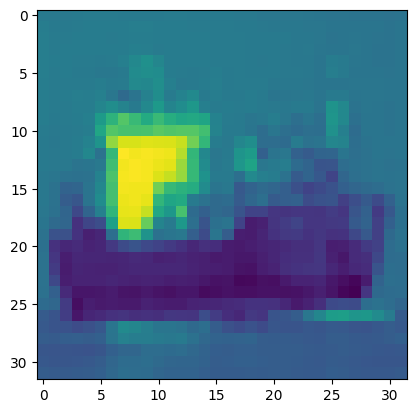

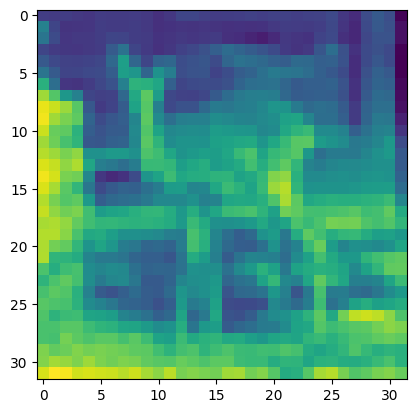

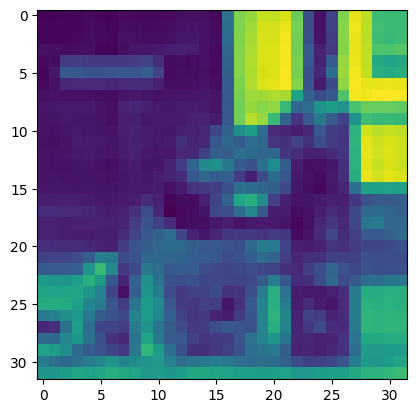

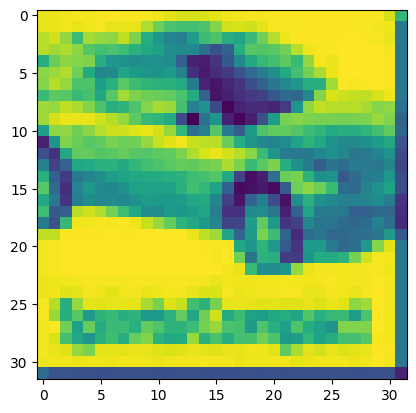

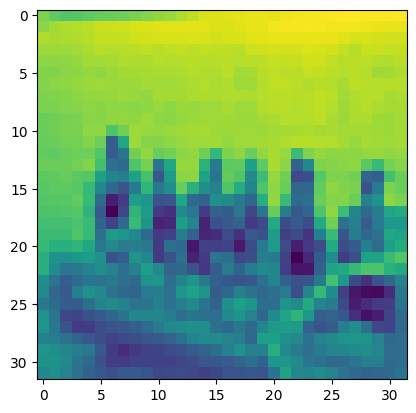

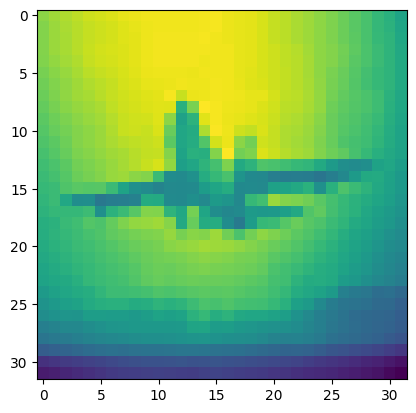

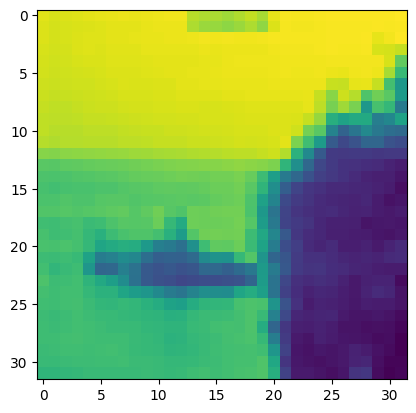

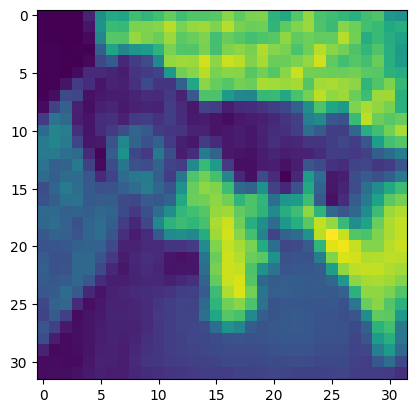

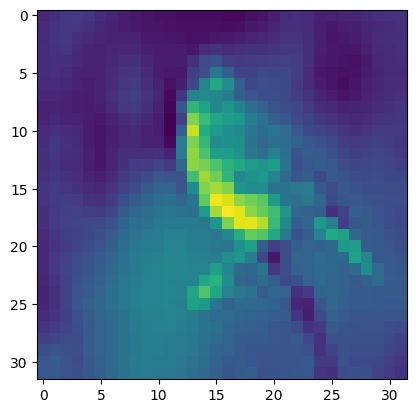

In [152]:
for temp in random_idx:
    plt.figure()
    plt.imshow(X_train[temp])
#     plt.title(class_names[y_train[temp]])

In [165]:
# from tensorflow.keras.utils import to_categorical
# # 원핫 인코딩 형식으로 바꿔준다.
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, random_state = 100)

In [166]:
X_train.shape

(35000, 32, 32, 1)

In [158]:
X_train = np.reshape(X_train/255, (-1, 32, 32,1))

X_test = np.reshape(X_test/255, (-1, 32, 32, 1))

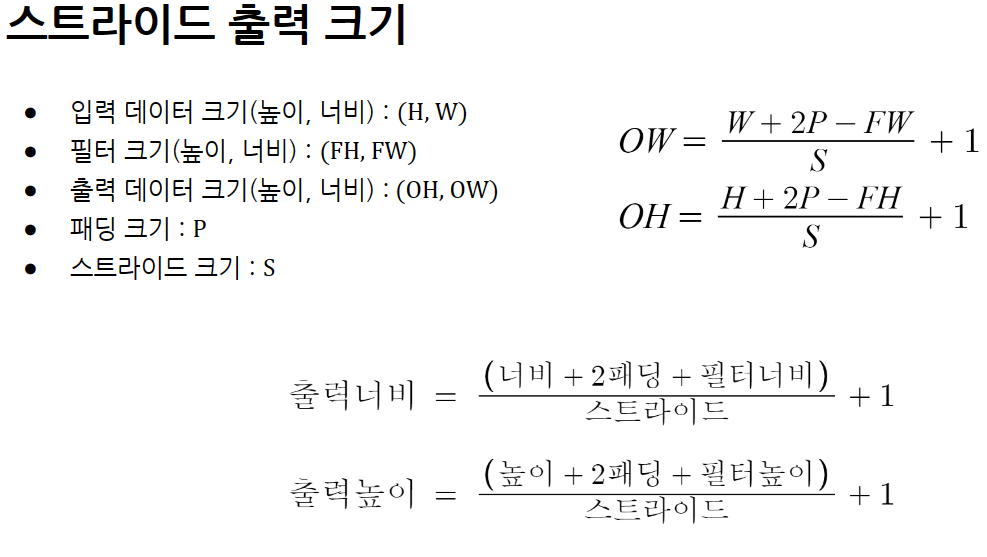

## MaxPool2D
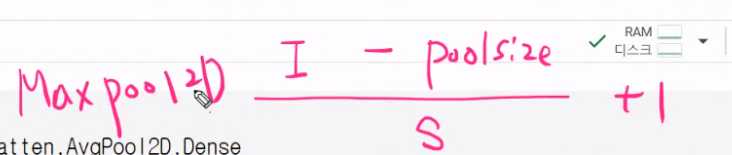

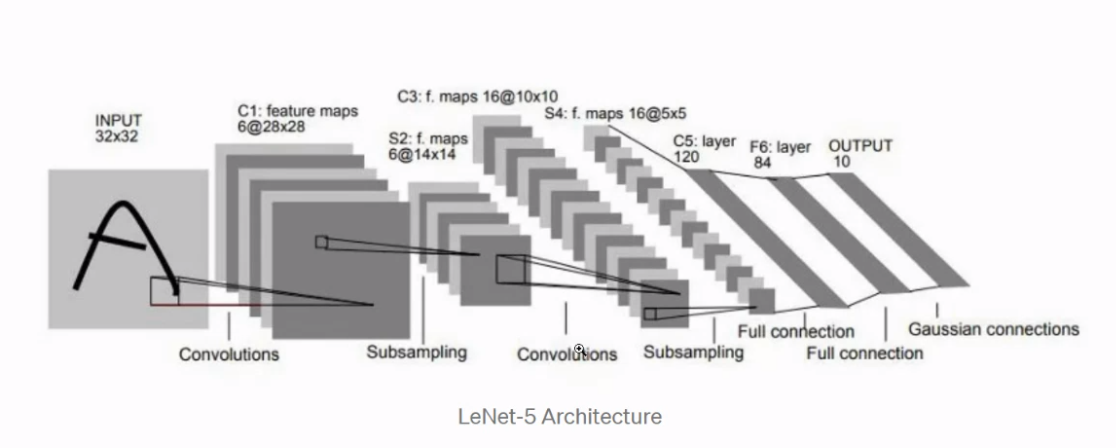

- input : 32*32, 채널 : 흑백이기에 1, output : 10 , filter : 5(5*5), stride : 1
- 스트라이드 출력 크기 : (32 + 0 - 5/ 1) + 1 = 28 즉, 32에서 이미지가 28로 줄어든다.

In [167]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AvgPool2D, Dense, Flatten

model = Sequential([
    Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'tanh', input_shape = (32, 32, 1)),
    # 평균2D로 인해 이미지의 크기가 절반으로 줄어든다. ( 즉, 28에서 14로 줄어든다.)
    AvgPool2D(pool_size = (2,2), strides = 2),
    Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'tanh'),
    AvgPool2D(pool_size = (2,2), strides = 2),
    Conv2D(filters = 120, kernel_size = 5, strides = 1, activation = 'tanh'),
    Flatten(),
    Dense(84, activation = 'tanh'),
    Dense(10, activation = 'softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
model.fit(X_train, y_train, epochs = 20, batch_size = 128)

Epoch 1/20
274/274 [==============================] - 1s 3ms/step - loss: 1.8833 - acc: 0.3282
Epoch 2/20
274/274 [==============================] - 1s 2ms/step - loss: 1.6743 - acc: 0.4051
Epoch 3/20
274/274 [==============================] - 1s 2ms/step - loss: 1.5847 - acc: 0.4346
Epoch 4/20
274/274 [==============================] - 1s 3ms/step - loss: 1.5091 - acc: 0.4640
Epoch 5/20
274/274 [==============================] - 1s 5ms/step - loss: 1.4363 - acc: 0.4911
Epoch 6/20
274/274 [==============================] - 1s 5ms/step - loss: 1.3961 - acc: 0.5101
Epoch 7/20
274/274 [==============================] - 1s 5ms/step - loss: 1.3412 - acc: 0.5277
Epoch 8/20
274/274 [==============================] - 1s 5ms/step - loss: 1.2988 - acc: 0.5439
Epoch 9/20
274/274 [==============================] - 1s 5ms/step - loss: 1.2617 - acc: 0.5547
Epoch 10/20
274/274 [==============================] - 1s 5ms/step - loss: 1.2165 - acc: 0.5718
Epoch 11/20
274/274 [============================

In [168]:
model.evaluate(X_test, y_test)

469/469 [==============================] - 1s 2ms/step - loss: 1.3799 - acc: 0.5405


[1.3798706531524658, 0.5405333042144775]